# APS 5 - Questões com auxílio do Pandas

** Nome: ** <font color=blue> Matita</font>


APS **INDIVIDUAL**

Data de Entrega: 26/Set até às 23h59 via GitHub.

Vamos trabalhar com dados do USGS (United States Geological Survey) para tentar determinar se os abalos detectados no hemisfério Norte têm grande probabilidade de serem testes nucleares.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy.stats import expon
import matplotlib.pyplot as plt

In [104]:
#Abrir o arquivo
df = pd.read_csv('earthquake.csv')
#listar colunas
print(list(df))

['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error', 'Depth Seismic Stations', 'Magnitude', 'Magnitude Type', 'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID', 'Source', 'Location Source', 'Magnitude Source', 'Status']


In [105]:
df.rename(columns={'Magnitude Error' : 'Magnitude_Error',
'Magnitude Type' : 'Magnitude_Type'}, inplace=True)

## Liste as primeiras linhas do DataFrame

In [3]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


## Q1 - Manipulando o DataFrame

Crie uma coluna chamada `Hemisfério` baseada na Latitude

A regra de formação é a seguinte:

Valor | Critério
---|---
Norte | Latitude positiva
Sul | Latitude negativa

In [114]:
l=[]
for i in df.Latitude:
    if i>0:
        l.append("Norte")
    else:
        l.append("Sul")
        
df["Hemisferio"]=l
df.Hemisferio.head()




0    Norte
1    Norte
2      Sul
3      Sul
4    Norte
Name: Hemisferio, dtype: object

## Q2 - Fit e Histograma

Faça o Histograma da Magnitude. Interprete.

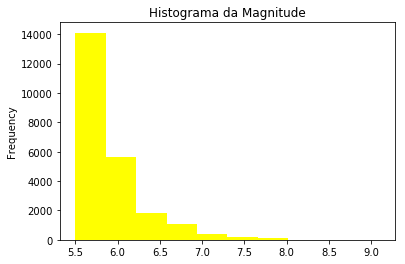

In [5]:
df["Magnitude"].plot.hist(title="Histograma da Magnitude",color="yellow")

Faça o fit de uma distribuição exponencial sobre os dados da Magnitude, achando os valores de **loc** e **scale**. Interprete loc e scale no caso da exponencial.
Documentação: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html

In [6]:
expon.fit(df.Magnitude, loc=0, scale=1)

(5.4999999994058708, 0.38254168278816081)

Refaça o Histograma plotando a fdp (função densidade de probabilidade) da exponencial com os parâmetros achados no fit em cima. Cuidado com o domínio utilizado. Interprete.


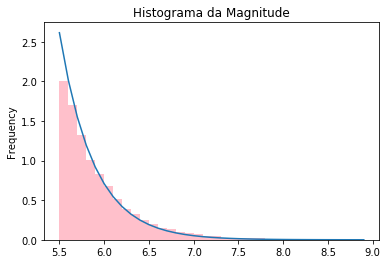

In [7]:
x=np.arange(5.5,9,0.1)

plt.plot(x,expon.pdf(x,loc=5.4999999994058708,scale=0.38254168278816081))

df["Magnitude"].plot.hist(bins=x,normed=True,alpha=1,title="Histograma da Magnitude",color="pink")

## Q3 - Tabela cruzada

Faça uma tabela de cruzamento das variáveis `Hemisfério` e `Type`

Sua tabela deve ser <font color=red> normalizada</font>

In [131]:
cruzado=pd.crosstab(df["Hemisferio"],df["Type"],margins=True,normalize=True)
cruzado


Type,Earthquake,Explosion,Nuclear Explosion,Rock Burst,All
Hemisferio,,,,,
Norte,0.447121,0.000085,0.006279,0.000000,0.453485
Sul,0.545191,0.000085,0.001196,0.000043,0.546515
All,0.992312,0.000171,0.007475,0.000043,1.000000


### Q3.1 - Qual a probabilidade de ocorrer um terremoto no hemisfério norte?

Adicione na célula abaixo o cálculo:

0.447121

Explique o seu raciocínio

Basta verificar a tabela que foi criada, poisela demonstra a probabilidade já apenas é necessário achar a coluna e a linha correta dos dados que no caso seriam a primeira coluna e primeira linha.

### Q3.2 - Dado que aconteceu no Norte, qual a probabilidade de ele ter sido `Nuclear Explosion`? 

Calcule a resposta abaixo, ou explique como a encontrou

Se for cálculo preencha a célula a seguir:

In [9]:
resultado=0.006279/0.453485*100
print(resultado)

1.3846102958201483


Se conseguir obter a resposta sem calcular, insira a resposta abaixo:

* A probabilidade de ter sido `Nuclear Explosion` é ...

In [134]:

explosion=1.3846102958201483/0.447121
print(explosion)

3.0967239199683045


## Q4 - Análise bivariada

Faça o *plot* de dispersão (*scatter plot*) entre as variáveis `Magnitude Error`  e `Depth`

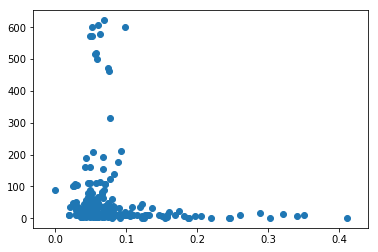

In [84]:
plt.scatter(df.Magnitude_Error, df.Depth)

Calcule a correlação entre as variáveis `Magnitude Error`  e `Depth`

In [86]:
df.Depth.corr(df.Magnitude_Error)

-0.076918438923387192

Explique o que significa o valor da correlação calculada acima? 

Pelo fato do valor estar próximo de zero a relação entre os dois e bem dispersa como podemos observar no gráfico.

## Q5 - Describe e boxplot

Faça o `describe` e o *boxplot* da `Latitude` e da `Longitude`. Explique os valores

In [47]:
df.Longitude.describe()

count    23412.000000
mean        39.639961
std        125.511959
min       -179.997000
25%        -76.349750
50%        103.982000
75%        145.026250
max        179.998000
Name: Longitude, dtype: float64

{'boxes': [<matplotlib.lines.Line2D at 0x1628a1a9048>],
 'caps': [<matplotlib.lines.Line2D at 0x1628a233a20>,
 'fliers': [<matplotlib.lines.Line2D at 0x1628a23ac50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1628a23a438>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1628a1a99b0>,
  <matplotlib.lines.Line2D at 0x1628a1a9ba8>]}

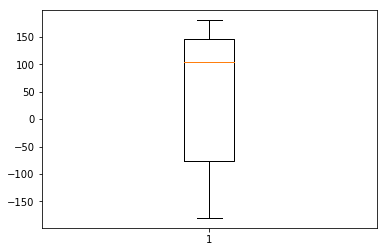

In [64]:
plt.boxplot(df.Longitude)

Bla balnaslfakfnpoqefiefnfnk

In [58]:
df.Latitude.describe()

count    23412.000000
mean         1.679033
std         30.113183
min        -77.080000
25%        -18.653000
50%         -3.568500
75%         26.190750
max         86.005000
Name: Latitude, dtype: float64

{'boxes': [<matplotlib.lines.Line2D at 0x1628a361c50>],
 'caps': [<matplotlib.lines.Line2D at 0x1628a36afd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1628a43def0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1628a43d080>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1628a361e10>,
  <matplotlib.lines.Line2D at 0x1628a36ae10>]}

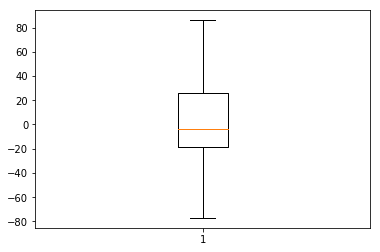

In [67]:
plt.boxplot(df.Latitude,0)

Após observar os boxplots é possível dizer que a mediana da longitude é maior demonstrando que a maioria dos eventos ocorre no horiente do planeta, e com desvio padrão maior.

## Q6 - Tirando conclusões com base nos dados

Em um certo lugar já ocorreram abalos com *Magnitude Type* `MB` e *Type* `Nuclear Explosion`. 
 
Responda: 
    * É mais provável que tenha sido no norte ou no sul? 
    
Assuma que os Magnitude Type e Type são independentes


In [127]:
pd.crosstab(df.Hemisferio,df.Type, normalize=True)

Type,Earthquake,Explosion,Nuclear Explosion,Rock Burst
Hemisferio,,,,
Norte,0.447121,0.000085,0.006279,0.000000
Sul,0.545191,0.000085,0.001196,0.000043


É mais provável no norte.